In [1]:
import torchvision
from torchvision import transforms
import torch
from torch import nn
from torch.utils.data import DataLoader

import os



total_fase = 2 
save_model = True
load_model = False
device = "cuda"
data_dir = "../data" 
batch_size = 32
#------------------------------------------------------------------------------------------------

# Conjunto de datos MNIST
train_data = torchvision.datasets.MNIST(
    root=data_dir,
    train=True,
    download=True,
    transform=transforms.ToTensor()
)
eval_data = torchvision.datasets.MNIST(
    root=data_dir,
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

In [2]:
import torch
from torch.utils.data import DataLoader, Subset

# Define el número total de clases en tu conjunto de datos
num_classes = 10  # Suponiendo que tienes 10 clases en total

# Lista para almacenar los DataLoaders de cada clase
class_dataloaders = []

# Itera sobre cada clase y crea un DataLoader para esa clase
for class_idx in range(num_classes):
    # Obtén los índices para la clase actual
    class_indices = [i for i in range(len(train_data)) if train_data.targets[i] == class_idx]
    
    # Subconjunto de datos para la clase actual
    class_subset = Subset(train_data, class_indices)
    
    # DataLoader para la clase actual
    class_dataloader = DataLoader(class_subset, batch_size=batch_size, shuffle=True)
    
    # Agrega el DataLoader al listado
    class_dataloaders.append(class_dataloader)


IndexError: index 5 is out of bounds for axis 0 with size 5

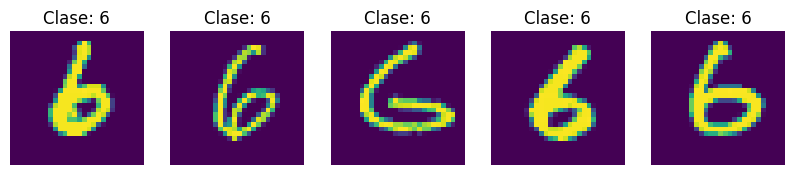

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Elegir un DataLoader específico para visualizar, por ejemplo, el DataLoader de la clase 0
dataloader = class_dataloaders[6]  # Cambia el índice según sea necesario

# Iterar sobre los lotes y mostrar las imágenes
for images, labels in dataloader:
    # Convertir las imágenes a un arreglo numpy
    images = images.numpy()
    labels = labels.numpy()
    
    # Mostrar las imágenes en una cuadrícula
    fig, axes = plt.subplots(figsize=(10, 4), ncols=min(len(images), 5))
    for i, (image, label) in enumerate(zip(images, labels)):
        ax = axes[i]
        ax.imshow(np.transpose(image, (1, 2, 0)))  # Las imágenes están en formato (C x H x W), hay que transponerlas a (H x W x C) para mostrarlas con matplotlib
        ax.set_title(f'Clase: {label}')
        ax.axis('off')
    plt.show()

In [ ]:
# Define el número total de clases en tu conjunto de datos
num_classes = 10  # Suponiendo que tienes 10 clases en total

# Lista para almacenar los DataLoaders de evaluación de cada clase
eval_class_dataloaders = []

# Itera sobre cada clase y crea un DataLoader de evaluación para esa clase
for class_idx in range(num_classes):
    # Obtén los índices para la clase actual en el conjunto de evaluación
    class_indices_eval = [i for i in range(len(eval_data)) if eval_data.targets[i] == class_idx]
    
    # Subconjunto de datos de evaluación para la clase actual
    class_subset_eval = Subset(eval_data, class_indices_eval)
    
    # DataLoader de evaluación para la clase actual
    class_dataloader_eval = DataLoader(class_subset_eval, batch_size=batch_size, shuffle=True)
    
    # Agrega el DataLoader de evaluación al listado
    eval_class_dataloaders.append(class_dataloader_eval)
